In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

# Initialize the Chrome WebDriver
# Replace 'path_to_chromedriver' with the actual path to your chromedriver executable
driver = webdriver.Chrome()
# Open the login page
driver.get('https://www.tijorifinance.com/account/signin/')

In [3]:

# Find the email and password fields and enter your email and password
# Replace 'your_email' and 'your_password' with your actual email and password
email_id = 'hi.yashgupta@gmail.com'
pwd = 'helloyash123@'
driver.find_element(By.ID,'email').send_keys(email_id)
driver.find_element(By.ID,'pwd-field').send_keys(pwd)

In [4]:
# Find the login button by exact text and click it
login_button = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.XPATH, "//button[text()='Sign in']"))
)
login_button.click()

In [5]:
driver.get('https://www.tijorifinance.com/in/markets')

In [6]:
# Scrape the table and store it in a DataFrame
table = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.ID, 'market__table__niche')))
df = pd.read_html(driver.execute_script('return arguments[0].outerHTML;', table))[0]

In [7]:
driver.quit()

In [8]:
# Remove the unnecessary columns
df_cleaned = df.drop(columns=["WEIGHT", "1D", "1W", "2YR*", "3YR*", "5YR*"])

# Rename the 'Unnamed: 0' column to 'Niche'
df_cleaned.rename(columns={'Unnamed: 0': 'Niche'}, inplace=True)
df_cleaned['Niche'] = df_cleaned['Niche'].str.replace('TJI ', '')

# Convert all % values to float
numeric_columns = df_cleaned.select_dtypes(include=['object']).columns.drop('Niche')
for column in numeric_columns:
    df_cleaned[column] = df_cleaned[column].str.rstrip('%').astype('float')

# Add ranks for 1M, 3M, 6M, 1YR* columns
df_cleaned['Rank 1M'] = df_cleaned['1M'].rank(ascending=False)
df_cleaned['Rank 3M'] = df_cleaned['3M'].rank(ascending=False)
df_cleaned['Rank 6M'] = df_cleaned['6M'].rank(ascending=False)
df_cleaned['Rank 1YR*'] = df_cleaned['1YR*'].rank(ascending=False)

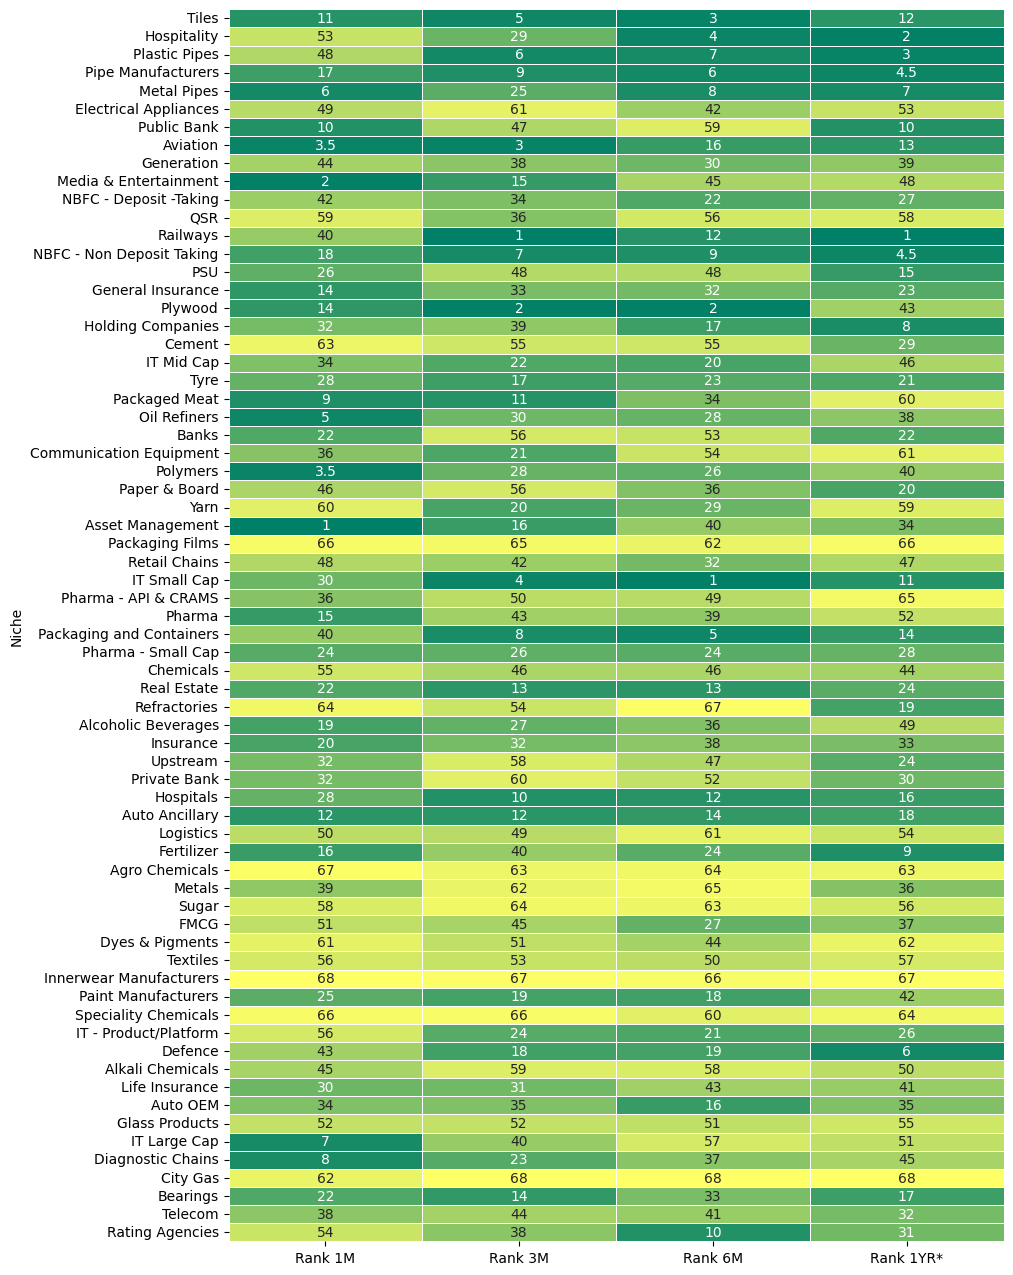

In [16]:
# Create a new DataFrame with only the rank columns
df_ranks = df_cleaned[['Niche', 'Rank 1M', 'Rank 3M', 'Rank 6M', 'Rank 1YR*']].set_index('Niche')

# Create the heatmap
plt.figure(figsize=(10, 16))
sns.heatmap(df_ranks, cmap='summer', linewidths=0.5, annot=True, cbar=False)

# Show the plot
plt.show()
fig_name = f''
plt.savefig()